# Part 1: 

## a: In your opinion, what were the most important turning points in the history of deep learning?
In my opinion, the history of deep learning has several key turning points. Early neural networks and perceptrons introduced the idea of learning from data, but training deep networks became practical only after backpropagation was developed. The 2006 paper on deep belief networks and the term "deep learning" marked a significant turning point, separating it from traditional neural networks.

The success of GPU-accelerated CNNs in 2012 (e.g., AlexNet) showed that deep networks could achieve state-of-the-art results in image recognition. Later, architectures like RNNs, LSTMs, and Transformers revolutionized natural language processing and sequence modeling. Today, large language models such as ChatGPT have transformed how we interact with AI. Personally and most recently, I found OpenAI Five impressive as well, since it showed how reinforcement learning could train agents to reach a superhuman win rate in complex environments.

## b: Explain the ADAM optimizer.
The ADAM (Adaptive Moment Estimation) is basically an optimizer that improves how neural networks learn. It is one of the most widely used optimizers in deep learning. ADAM optimizer is an advanced optimization algorithm that combines the benefits of two other popular optimizers: AdaGrad (moving averages of past gradients) and RMSProp (scaling updates based on squared gradients). It computes adaptive learning rates for each parameter by maintaining two moving averages: the first moment (mean) and the second moment (uncentered variance) of the gradients. This means it can train faster and more reliably on large or noisy datasets.

### c: Assume data input is a single 30x40 pixel image. First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1) and padding='valid'. What are the output dimensions?


We use the standard convolution output size formula:

$$
H_{out} = \frac{H_{in} + 2 \cdot P_h - K_h}{S_h} + 1
$$

$$
W_{out} = \frac{W_{in} + 2 \cdot P_w - K_w}{S_w} + 1
$$

Where:

- $(H_{in}, W_{in})$ = input height and width  
- $(K_h, K_w)$ = kernel size  
- $(S_h, S_w)$ = stride  
- $(P_h, P_w)$ = padding (0 for `"valid"`)  

In [55]:
H_in, W_in = 30, 40  

# Conv layer parameters
kernel_h, kernel_w = 3, 2 # kernel size
stride_h, stride_w = 1, 1 # stride
pad_h, pad_w = 0, 0   # 'valid' means no padding
num_filters = 5 # number of filters

# Compute output dimensions from the formiula 
H_out = (H_in + 2*pad_h - kernel_h)//stride_h + 1
W_out = (W_in + 2*pad_w - kernel_w)//stride_w + 1

output_shape = (num_filters, H_out, W_out)
print("Output shape:", output_shape)

Output shape: (5, 28, 39)


> So the output is **5 feature maps of size 28×39**.

## d: Assuming ReLU activations and offsets, and that the last layer is softmax, how many parameters does this network have:  

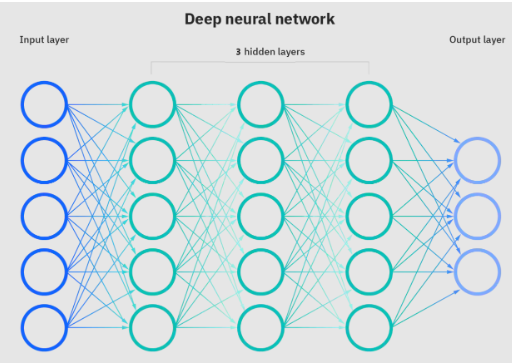

### Answer: 

From the image above we can see the nueral networks has 5 input nuerons, 3 hidden layers of 5 nuerons each, and 3 output neurons. 

### how many parameters does this network have:

* Weights between two fully connected layers of sizes $(n_{\text{in}})$ and $(n_{\text{out}}) = (n_{\text{in}} \times n_{\text{out}})$.
* Biases (offsets) for the target layer = $(n_{\text{out}})$.
* Total params for that connection = weights + biases.

Layers and parameter counts:

1. **Input (5) → Hidden1 (5):** $(5\times5 = 25)$ weights + (5) biases = **30** 
2. **Hidden1 (5) → Hidden2 (5):** $(5\times5 = 25)$ + (5) = **30**
3. **Hidden2 (5) → Hidden3 (5):** $(5\times5 = 25)$ + (5) = **30**
4. **Hidden3 (5) → Output (3):** $(5\times3 = 15)$ + (3) = **18**

**Total parameters = 30 + 30 + 30 + 18 = 108**


**Answer:** The network has **108 parameters** (weights + biases).


## e: What is the loss for this minibatch?
For a given minibatch, the targets are [1,4, 5, 8] and the network output is [0.1,4.4,0.2,10]. If the loss function is "torch.nn.HuberLoss(reduction='mean', delta=1.0)"

### Answer:
Using the definition of **Huber Loss** i will calculate the loss step by step:
The Huber loss for each element is defined as: 
$[
L(y, \hat{y}) =
\begin{cases}
0.5 \cdot (y - \hat{y})^2 & \text{if } |y - \hat{y}| < \delta \
\delta \cdot (|y - \hat{y}| - 0.5 \cdot \delta) & \text{otherwise}
\end{cases}
]$
with δ = 1.0. Since `reduction="mean"`, we average over the minibatch.

#### Step 1: Data

* Targets: `[1, 4, 5, 8]`
* Predictions: `[0.1, 4.4, 0.2, 10]`

#### Step 2: Errors
$[
e = y - \hat{y}
]$
* (1 - 0.1) = **0.9**
* (4 - 4.4) = **-0.4**
* (5 - 0.2) = **4.8**
* (8 - 10) = **-2.0**
Absolute errors: `[0.9, 0.4, 4.8, 2.0]`

#### Step 3: Apply Huber formula

* For 0.9 (< 1): $(0.5 \times 0.9^2 = 0.405)$
* For 0.4 (< 1): $(0.5 \times 0.4^2 = 0.08)$
* For 4.8 (≥ 1): $(1 \times (4.8 - 0.5) = 4.3)$
* For 2.0 (≥ 1): $(1 \times (2.0 - 0.5) = 1.5)$

#### Step 4: Mean reduction
$[
\text{loss} = \frac{0.405 + 0.08 + 4.3 + 1.5}{4} = \frac{6.285}{4} = 1.57125
]$
> **The Huber loss for this minibatch is ≈ 1.57**




In [56]:
import torch
import torch.nn as nn

# Targets and predictions
y_true = torch.tensor([1.0, 4.0, 5.0, 8.0])
y_pred = torch.tensor([0.1, 4.4, 0.2, 10.0])

#Create a criterion that uses a squared term to calculate the loss later
criterion = nn.HuberLoss(reduction='mean', delta=1.0)

# Compute loss
loss = criterion(y_pred, y_true)

print("Huber Loss:", loss.item())

Huber Loss: 1.571250081062317


# Part 2 Writing a PyTorch dataset 



In [57]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Answer
To solve this excercise i created a custom pytorch dataset class ``InsectDataset``. The datasets reads the insects.csv file, map each species name to integer label, and loads the corresponding images from the extracted ``insects.zip`` folder. I also applied a transform to convert images into tensors for use in PyTorch.

In [58]:

class InsectsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Encode species → integer
        self.species_to_idx = {species: idx 
                               for idx, species in enumerate(self.annotations["species"].unique())}
        self.idx_to_species = {v: k for k, v in self.species_to_idx.items()}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx, 2])  # filename col
        image = Image.open(img_name).convert("RGB")
        species = self.annotations.iloc[idx, 1]  # species col
        label = self.species_to_idx[species]

        if self.transform:
            image = self.transform(image)

        return image, label

After reviewing the datasets and testing it, i noticed an important detail that the images in the dataset have different resolutions, which caused an error when batching them with the ``Dataloader(RuntimeEroror : Stack expects each tensor to be equal size).`` And to fix this i added a ``transforms.Resize()`` operation so that all the images are scaled to the same size before being converted into  tensors. this will make sure that the Dataloader Can create minibatches coorrectly.

The dataset now returns ``(image_tensor,label)`` pairs, and labels can also be mapped to their species names for visualization.

In [59]:

transform = transforms.Compose([
    transforms.Resize((128, 128)),   # ensure same size
    transforms.ToTensor()
])


# Part 3
## a: describe & visualize the data
### Answer: 
We are given two datasets: trainData and testData.
Each row in these files contains three values:
- Label (first column): The label is an integer ranging from 0 to 4 (five classes)
- Feature 1 (second column): float.
- Feature 2 (third column): float.

> Feature values are continuous and lie approximately within -1 to 1. 
> Each lable corresponds to a different cluster of points in the feature space
> Both trainData and testData have the same format.
After downloading the data as Csv files, we load them into the notebook, with simple labeling

In [60]:

train = pd.read_csv("../data/trainData.csv", delim_whitespace=True, header=None)
test = pd.read_csv("../data/testData.csv", delim_whitespace=True, header=None)

# rename for clarity
train.columns = ["label", "x1", "x2"]
test.columns = ["label", "x1", "x2"]

print(train.head(5))
print(test.head(5))
print(train.describe())
print("Train class distribution:")
print(train["label"].value_counts().sort_index())

print("\nTest class distribution:")
print(test["label"].value_counts().sort_index())

   label        x1        x2
0    2.0  0.243584  0.539536
1    0.0  0.029800  0.074531
2    4.0 -0.437585 -0.383632
3    2.0 -0.224602  0.407026
4    3.0  0.284853  0.800316
   label        x1        x2
0    0.0  0.000556 -0.628762
1    2.0  0.494479  0.474936
2    2.0 -0.244725  0.242440
3    0.0 -0.493843 -0.585407
4    3.0  0.757772  0.594606
             label           x1           x2
count  1200.000000  1200.000000  1200.000000
mean      2.001667    -0.005118    -0.011813
std       1.423617     0.406383     0.407423
min       0.000000    -0.991967    -0.940022
25%       1.000000    -0.252324    -0.252466
50%       2.000000     0.000000    -0.011340
75%       3.000000     0.244759     0.252078
max       4.000000     0.963337     0.999714
Train class distribution:
0.0    245
1.0    234
2.0    240
3.0    236
4.0    245
Name: label, dtype: int64

Test class distribution:
0.0    55
1.0    66
2.0    59
3.0    64
4.0    55
Name: label, dtype: int64


- Visualising the Data: 

  Since the data is 2D, the scatter plot is the most natural choice

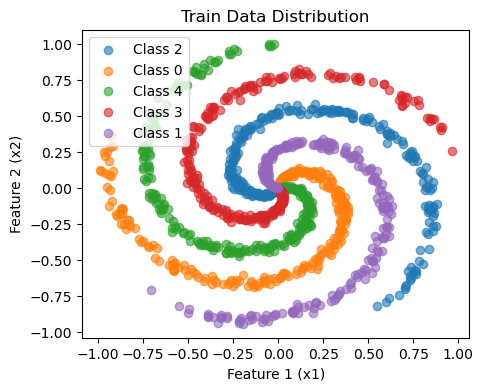

In [70]:

plt.figure(figsize=(5,4))
for lbl in train["label"].unique():
    subset = train[train["label"] == lbl]
    plt.scatter(subset["x1"], subset["x2"], label=f"Class {int(lbl)}", alpha=0.6)

plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.legend()
plt.title("Train Data Distribution")
plt.show()

> as we can see from the scatter plot the classes appear to be well-seperated clusters in 2D space.

## b: Design & Train a Neural Network in PyTorch
### Answer
After examining the data, a simple feedforward neural network (MLP) should works well here.

#### The architecture would be : 
 - Input: 2 neurons ("x1,x2")
 - Hidden Layer 1: 32 nuerons,ReLU 
 - Hidden Layer 2: 32 nuerons, ReLU
 - OutPut: 5 Nuerons (softmax over 5 classes)
    > After testing from 16 neurons, turns out out hidden layers with 32 neurons is expressive enough and have a decent accuracy.

In [62]:
class SpiralNet(nn.Module):
    def __init__(self):
        super(SpiralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 32), # 2 neurons for input
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 5)  # 5 classes
        )
    def forward(self, x):
        return self.layers(x)


#### Training Strategy
Using the Clas we just created, we are going to training using optimizer and torch nueral networks loss function, and decide on training parameter such as batch size and Epochs.

- Loss function: CrossEntropyLoss (multi-class classification).

- Optimizer: Adam (fast convergence), learning rate 1e-3.

- Batch size: 32.

- Epochs: ~100–200 (we will stop when validation loss stabilizes).

In [63]:
model = SpiralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

X_train = torch.tensor(train[["x1","x2"]].values, dtype=torch.float32)
y_train = torch.tensor(train["label"].values, dtype=torch.long)

X_test = torch.tensor(test[["x1","x2"]].values, dtype=torch.float32)
y_test = torch.tensor(test["label"].values, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

for epoch in range(200):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 50 == 0:
        pred = model(X_test).argmax(1)
        acc = (pred == y_test).float().mean().item()
        print(f"Epoch [{epoch+1}/200], Loss: {loss.item():.4f}, Test Acc: {acc:.4f}")


Epoch [50/200], Loss: 0.3087, Test Acc: 0.8997
Epoch [100/200], Loss: 0.2769, Test Acc: 0.9632
Epoch [150/200], Loss: 0.0081, Test Acc: 0.9866
Epoch [200/200], Loss: 0.0035, Test Acc: 0.9900


I noticed an imporovement in the accuracy and the decreasing loss, so i decided to stop at 200.
we can try increasing epochs but then we will be risking overfitting the model.

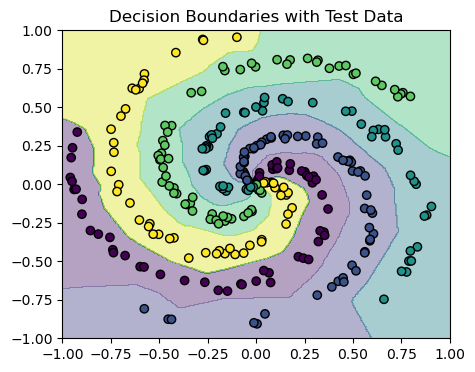

In [67]:
model.cpu()
x, y = np.meshgrid(np.linspace(-1,1,300), np.linspace(-1,1,300))
xy = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
z = model(torch.tensor(xy).float()).detach().numpy()
z = np.argmax(z, 1).reshape(300,300)

plt.figure(figsize=(5, 4))  # smaller square plot
plt.contourf(x, y, z, alpha=0.4)
plt.scatter(test["x1"], test["x2"], c=test["label"], edgecolors='k')
plt.title("Decision Boundaries with Test Data")
plt.show()


From the contour plot over the 2D feature space matches the scatter points I visualised earlier, i can
conclude that the network correctly seperates clusters, confirming that a simple MLP is sufficient
for this problem.

## Conclusion
The 2D dataset is well-suited for a small MLP. The Chosen architecture, optimizer, and training strategy achieved high accuracy (99%), with clear decision boundaries and no overfitting. 